<a href="https://colab.research.google.com/github/ripatanny101/Analyzing-Stock-Prices/blob/main/CIS_3120%2C_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#imprting libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np


# Set the URLs for different teams
team_type = {
    'mens_volleyball': ['https://ccnyathletics.com/sports/mens-volleyball/roster?view=2','https://lehmanathletics.com/sports/mens-volleyball/roster?view=2','https://www.brooklyncollegeathletics.com/sports/mens-volleyball/roster?view=2','https://johnjayathletics.com/sports/mens-volleyball/roster?view=2','https://athletics.baruch.cuny.edu/sports/mens-volleyball/roster?view=2','https://mecathletics.com/sports/mens-volleyball/roster?view=2','https://www.huntercollegeathletics.com/sports/mens-volleyball/roster?view=2','https://yorkathletics.com/sports/mens-volleyball/roster','https://ballstatesports.com/sports/mens-volleyball/roster?view=2' ],
    'womens_volleyball': ['https://bmccathletics.com/sports/womens-volleyball/roster?view=2','https://yorkathletics.com/sports/womens-volleyball/roster','https://hostosathletics.com/sports/womens-volleyball/roster?view=2','https://bronxbroncos.com/sports/womens-volleyball/roster/2021?view=2','https://queensknights.com/sports/womens-volleyball/roster?view=2','https://augustajags.com/sports/wvball/roster?view=2','https://flaglerathletics.com/sports/womens-volleyball/roster?view=2','https://pacersports.com/sports/womens-volleyball/roster','https://www.golhu.com/sports/womens-volleyball/roster?view=2' ],
    'mens_swimming': ['https://csidolphins.com/sports/mens-swimming-and-diving/roster?view=2','https://yorkathletics.com/sports/mens-swimming-and-diving/roster','https://athletics.baruch.cuny.edu/sports/mens-swimming-and-diving/roster?view=2','https://www.brooklyncollegeathletics.com/sports/mens-swimming-and-diving/roster/2022-23?view=2','https://lindenwoodlions.com/sports/mens-swimming-and-diving/roster?view=2','https://mckbearcats.com/sports/mens-swimming-and-diving/roster?view=2','https://ramapoathletics.com/sports/mens-swimming-and-diving/roster?view=2','https://oneontaathletics.com/sports/mens-swimming-and-diving/roster?view=2','https://bubearcats.com/sports/mens-swimming-and-diving/roster/2021-22?view=2','https://albrightathletics.com/sports/mens-swimming-and-diving/roster/2021-22?view=2'],
    'womens_swimming': ['https://csidolphins.com/sports/womens-swimming-and-diving/roster?view=2','https://queensknights.com/sports/womens-swimming-and-diving/roster?view=2','https://yorkathletics.com/sports/womens-swimming-and-diving/roster/2021-22','https://athletics.baruch.cuny.edu/sports/womens-swimming-and-diving/roster/2021-22?view=2','https://www.brooklyncollegeathletics.com/sports/womens-swimming-and-diving/roster/2022-23?view=2','https://lindenwoodlions.com/sports/womens-swimming-and-diving/roster?view=2','https://mckbearcats.com/sports/womens-swimming-and-diving/roster?view=2','https://ramapoathletics.com/sports/womens-swimming-and-diving/roster?view=2','https://keanathletics.com/sports/womens-swimming-and-diving/roster?view=2','https://oneontaathletics.com/sports/womens-swimming-and-diving/roster?view=2']
}

# Function to scrape data and compile a DataFrame of all the names and heights
def process_heights(list_of_urls):
    heights = []
    names = []

    for url in list_of_urls:
        response = requests.get(url)  #making request to the server
        if response.status_code == 200:
            soup = BeautifulSoup(response.content, 'html.parser')
            rows = soup.find_all('td', class_='height')  #extracting all the td tag for height
            name_rows = soup.find_all('td', class_='sidearm-table-player-name') #extracting all the td tag for name

            for row, name_row in zip(rows, name_rows):
                height_str = row.get_text()
                name = name_row.get_text().strip()
                names.append(name)

                 #convert heights to numeric values and then from feet-inch to cm
                if height_str == '-':
                    heights.append(np.nan) #return nan for missing data
                else:
                    split_heights = height_str.split('-')
                    feet = float(split_heights[0])
                    inches = float(split_heights[1])
                    height_in_cm = (feet * 12 + inches) * 2.54
                    heights.append(height_in_cm)
        else:
            print(f'Website not accessible for {url}')

    #creating dataFrames for names & heights
    df = pd.DataFrame({'Name': names, 'Height': heights})
    df['Height'].fillna(df['Height'].mean(), inplace=True)
    return df

# Function to find the athletes with the 5 tallest and shortest unique heights
def find_extremes(df):
    # Drop duplicates and sort
    unique_heights = df['Height'].dropna().unique()
    unique_heights.sort()

    # Find the top 5 & bottom 5 unique heights
    top_heights = unique_heights[-5:]
    bottom_heights = unique_heights[:5]

    # Select all athletes with the top 5 & bottom 5 heights
    top_athletes = df[df['Height'].isin(top_heights)]
    bottom_athletes = df[df['Height'].isin(bottom_heights)]

    return top_athletes, bottom_athletes

# Process data, collect information on top and bottom athletes and average heights
team_averages = {}
extremes_data = {}

#finding & printing the average of heights for each team_type
for team_name, urls in team_type.items():
    team_df = process_heights(urls)
    average_height = team_df['Height'].mean()
    team_averages[team_name] = average_height
    print(f"The average height for {team_name} is: {average_height:.2f} cm")

#dataframe for top_athletes & bottom_athletes
    top_athletes, bottom_athletes = find_extremes(team_df)
    extremes_data[team_name] = {
        'Top 5 Tallest': top_athletes[['Name', 'Height']],
        'Top 5 Shortest': bottom_athletes[['Name', 'Height']]
    }

    # Save to CSV
    team_df.to_csv(f"{team_name}.csv")

# Print the extremes for each team (5 tallest & 5 shortest)
for team_name, athletes_data in extremes_data.items():
    print(f"\n{team_name} - Top 5 Tallest Athletes:")
    print(athletes_data['Top 5 Tallest'])

    print(f"\n{team_name} - Top 5 Shortest Athletes:")
    print(athletes_data['Top 5 Shortest'])


The average height for mens_volleyball is: 184.04 cm
The average height for womens_volleyball is: 171.34 cm
The average height for mens_swimming is: 181.34 cm
The average height for womens_swimming is: 167.15 cm

mens_volleyball - Top 5 Tallest Athletes:
                       Name  Height
33                Jason Lin  195.58
54    Kyle Barriffe-Johnson  200.66
69                Haoxin Hu  195.58
89             Lucas George  195.58
93           Annes Deljanin  200.66
96             Jon Pflueger  198.12
98       Matisse Lee-Maarek  198.12
102         Austinson Cooke  195.58
114     Griffin Satterfield  200.66
115         Trevor Phillips  198.12
116          Vanis Buckholz  198.12
117           Lucas Machado  198.12
118          Rodney Wallace  198.12
120              Ryan Bartz  195.58
121             Eyal Rawitz  198.12
122               Dyer Ball  198.12
123           Marty Canavan  195.58
126   Tinaishe Ndavazocheva  198.12
127  Braydon Savitski-Lynde  200.66
128          Patrick Roge

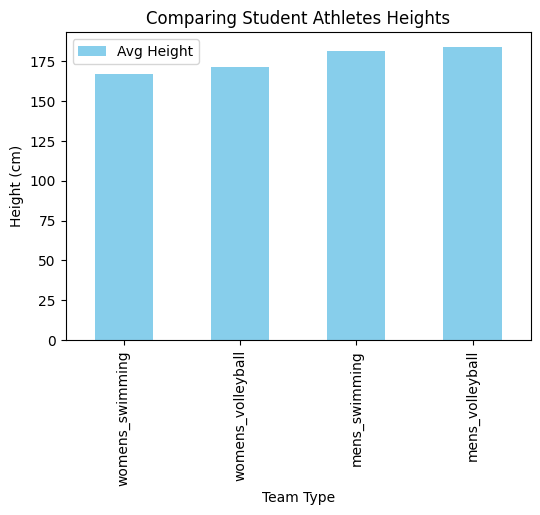

In [ ]:
# Generate and save the bar graph of average heights
import matplotlib.pyplot as plt
avg_heights_df = pd.DataFrame.from_dict(team_averages, orient='index', columns=['Avg Height'])
avg_heights_df.sort_values('Avg Height', inplace=True)
avg_heights_df.plot(kind='bar', y='Avg Height', color='skyblue', figsize=(6,4))
plt.xlabel('Team Type')
plt.ylabel('Height (cm)')
plt.title('Comparing Student Athletes Heights')
plt.show()
